In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/javlintor/Downloads/base_datos_2008.csv.bz2")
df.dropna(inplace = True, subset = ["ArrDelay","DepDelay","Distance","AirTime"])
# quitamos datos faltantes

sns.set(rc = {'figure.figsize':(15,10)}) #opciones de seaborn

In [2]:
df2 = df[df["Origin"].isin(["ATL", "HOU", "IND"])].sample(frac = 1).head(10000)

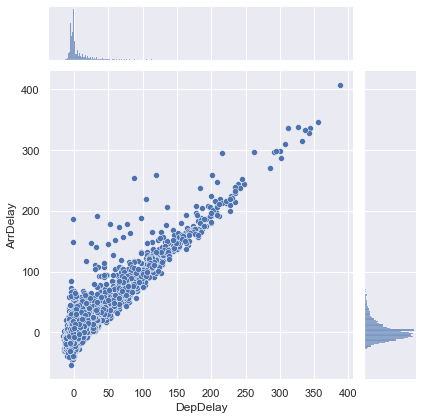

In [3]:
# Gráficos de nubes de puntos
sns.jointplot(x = "DepDelay", y = "ArrDelay", data = df2)
# Pinta una nube de puntos y ademas dos histagramas (uno para cada variable)

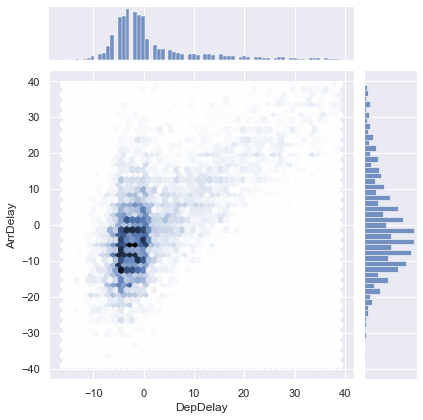

In [4]:
df3 = df2[(np.abs(df2["DepDelay"])<40) & (np.abs(df2["ArrDelay"])<40)]
sns.jointplot(x = "DepDelay", y = "ArrDelay", data = df3, kind = "hex")
# Nos quedamos con un dataframe mas concentrado y utilizamos el tipo "hex"

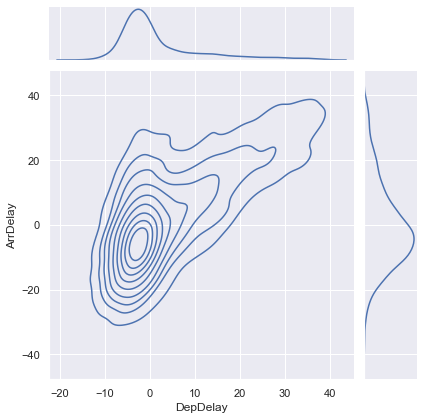

In [5]:
sns.jointplot(x = "DepDelay", y = "ArrDelay", data = df3, kind = "kde")
# Con curvas de nivel

In [6]:
# Vamos con los mapas de calor
# Creamos un groupby
gb_df = df2.groupby(["Origin", "Month"], as_index = False)["DepDelay"].mean()

In [7]:
# Tenemos que modificar la estructura del groupby para poder 
# utilizar los mapas de calor
data = gb_df.pivot("Month", "Origin", "DepDelay")
data

Origin        ATL        HOU        IND
Month                                  
1        8.437288   8.049505   7.106061
2       14.357711  13.913043   9.035088
3       15.789621  12.405063   8.608108
4       10.900151  12.123596   4.190476
5        6.454155   7.142857   3.575342
6       10.604956  12.857143  14.820896
7       22.197128  11.229167  11.246377
8       11.376662  10.640000   0.471698
9        4.151420   0.197531   1.409639
10       7.020468  10.309278   5.213115
11       7.031746   4.925000  -0.676056
12      14.264662  20.216867  19.136364

<AxesSubplot:xlabel='Origin', ylabel='Month'>

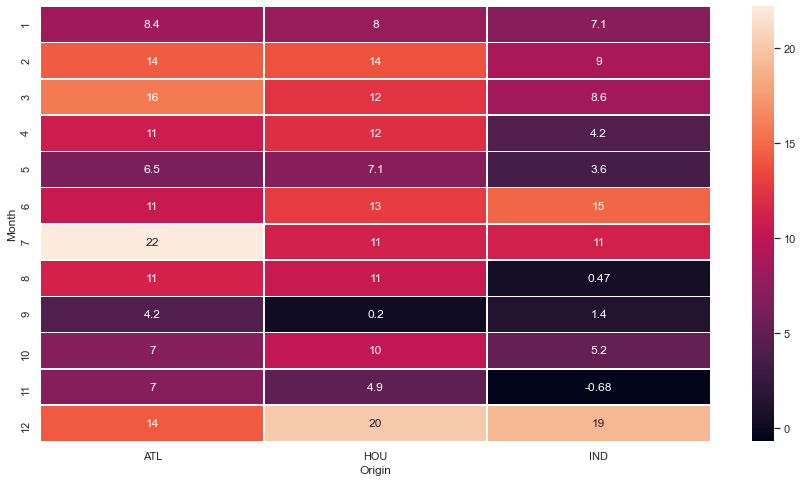

In [8]:
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(data = data, annot = True, linewidths = 0.5)